In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [164]:
# Read the dataset
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [165]:
bike.shape

(730, 16)

In [166]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [167]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Understand and Clean the data
- DROP unwanted variables



In [168]:
# drop unwanted variables 
#. instant - This is just a serial number will not contribute for anything

bike.drop("instant", axis =1, inplace = True)
bike.drop("dteday", axis =1, inplace = True)

In [169]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [171]:
# holiday also seems useless as same inforamtion can be inferred from Working day as 0
bike.workingday.value_counts()

#208 days for  weekends + 23 days for holidays in 2 years data

1    499
0    231
Name: workingday, dtype: int64

In [172]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [173]:
# Casual and registered sum is equal to count therefore they are correlated variable and may cause multicollinearity as they are heavily related. 

#drop holiday, casual and registered

bike.drop("holiday", axis =1, inplace= True)
bike.drop("casual", axis =1, inplace = True)
bike.drop("registered", axis =1, inplace = True)


In [174]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization and Exploration

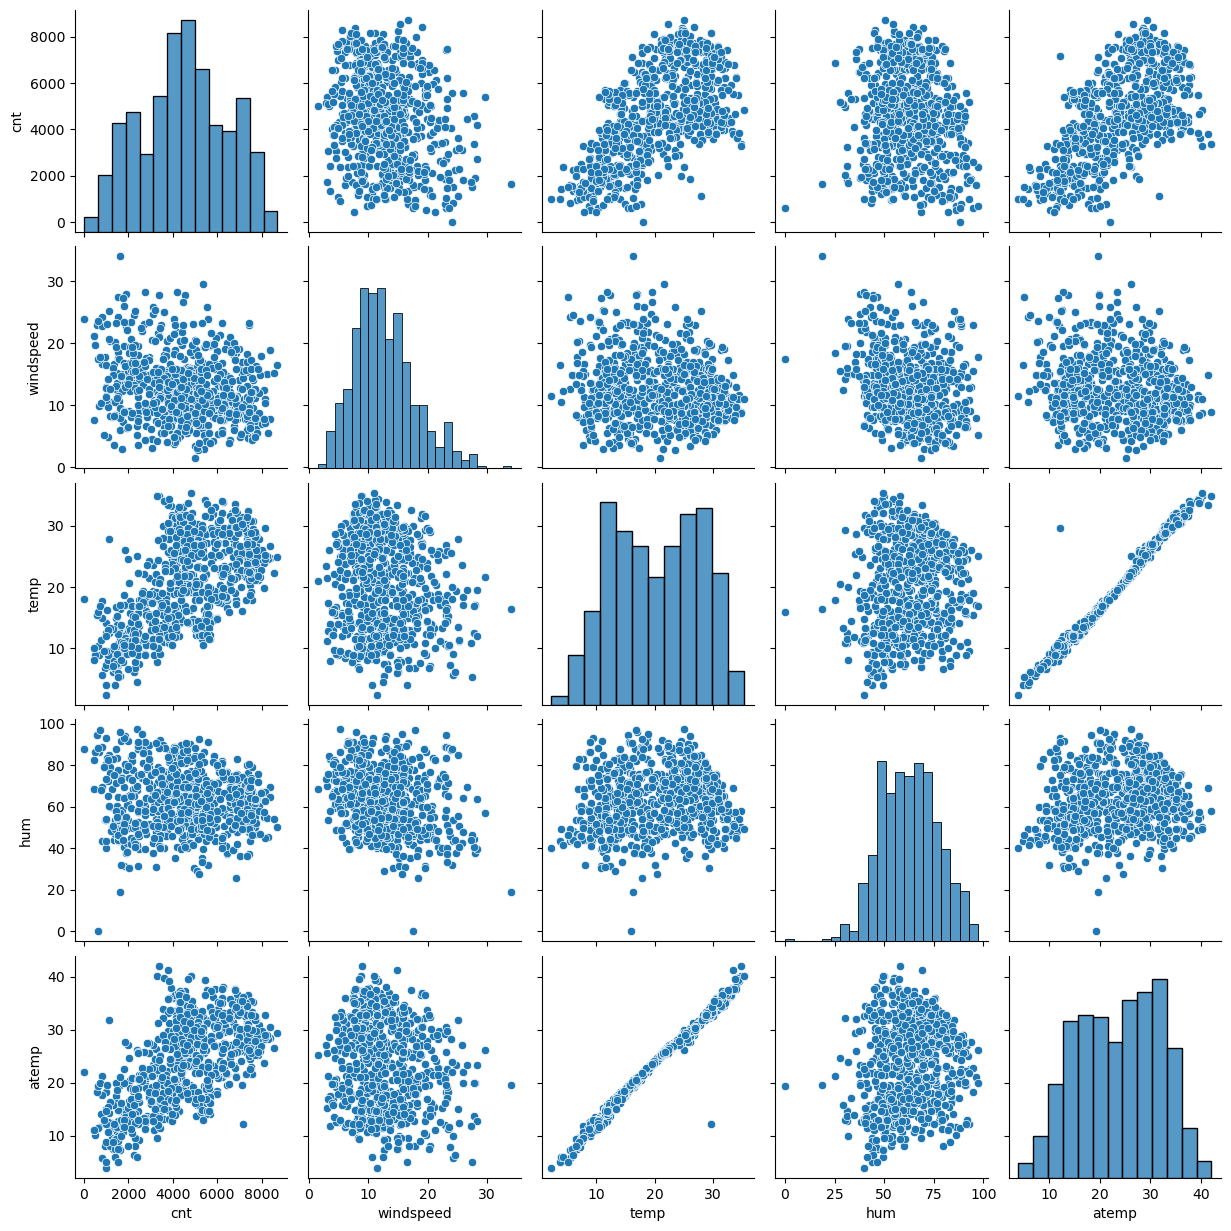

In [175]:
sns.pairplot(bike[["cnt","windspeed","temp","hum","atemp"]])
plt.show()

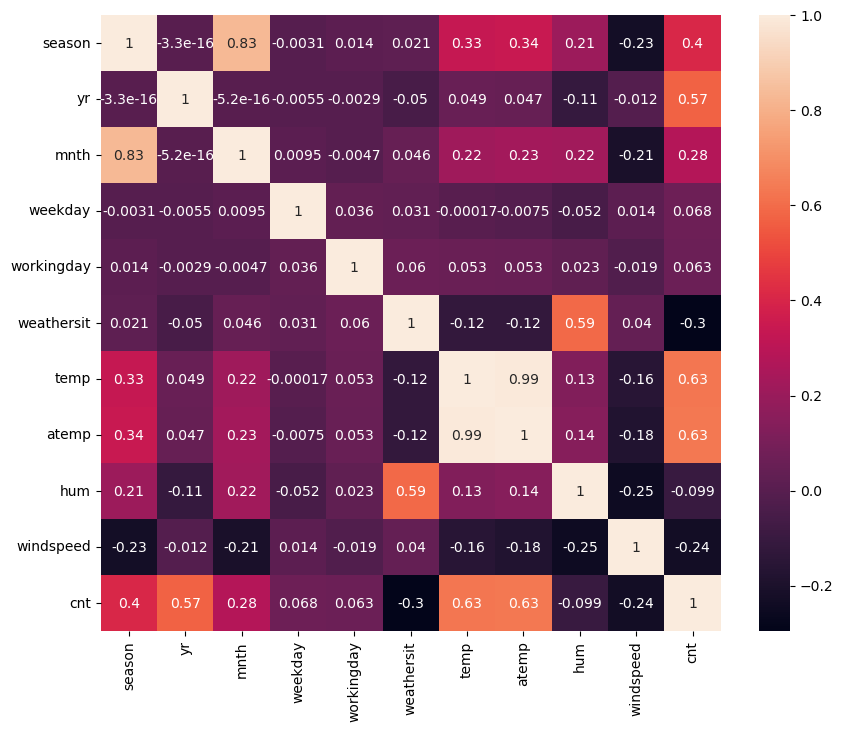

In [176]:
plt.figure(figsize =(10,8))
sns.heatmap(bike.corr(), annot=True)
plt.show()

In [177]:
# looking at the correlation chart temp and atemp are almost same and high correlation therefore dropping atemp
bike.drop("atemp", axis =1, inplace =True)



In [178]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


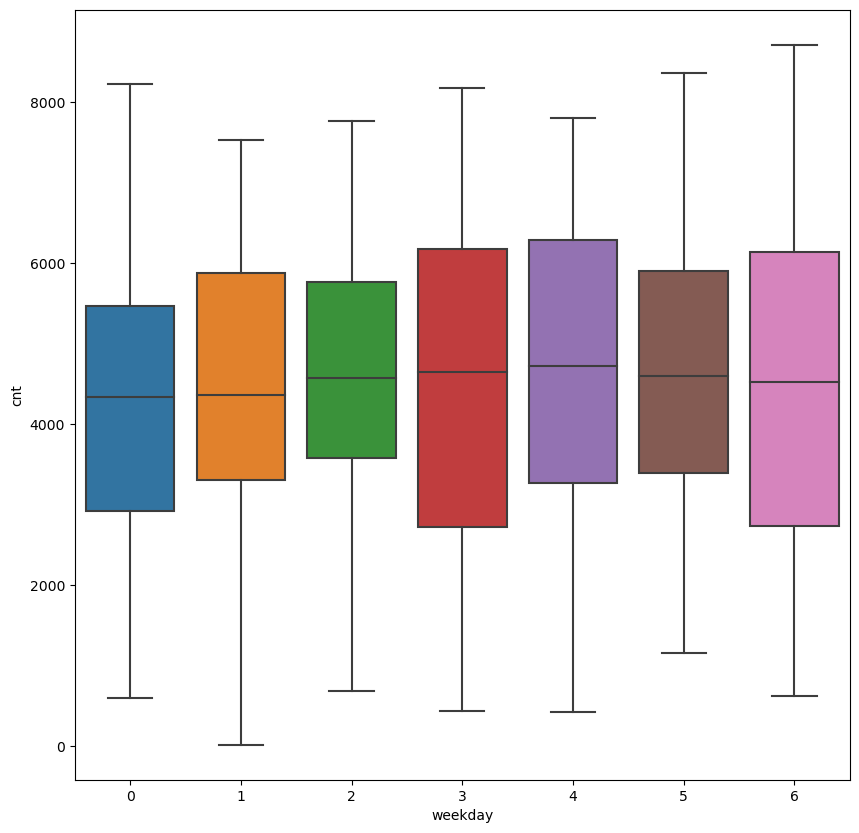

In [179]:
plt.figure(figsize = (10,10))
sns.boxplot(x='weekday' , y = "cnt" , data = bike )
plt.show()

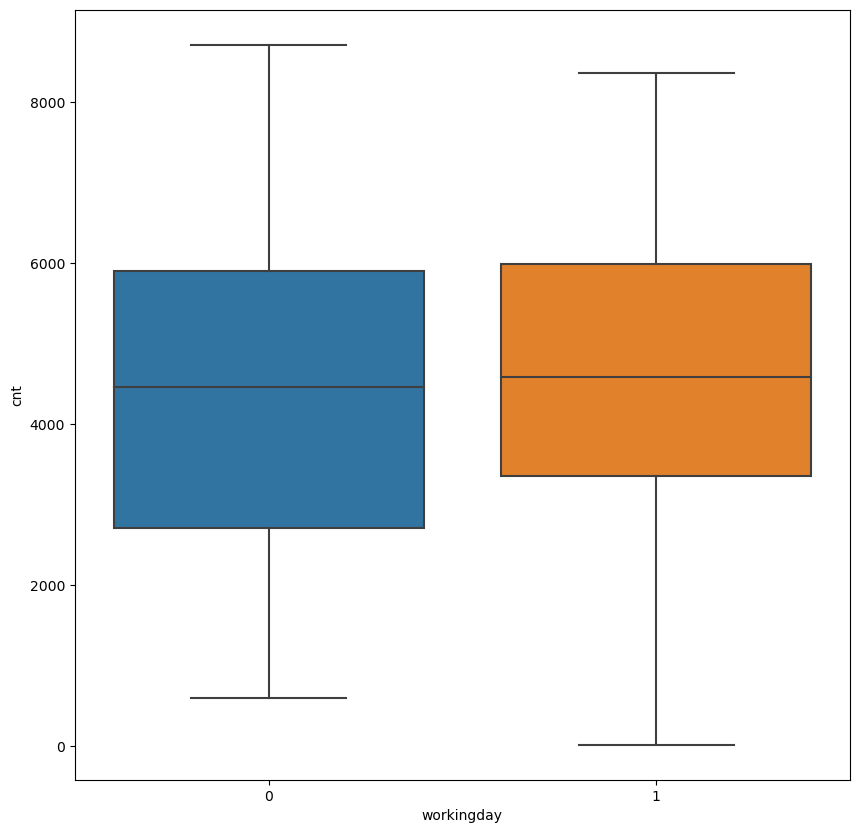

In [180]:
plt.figure(figsize = (10,10))
sns.boxplot(x='workingday' , y = "cnt" , data = bike )
plt.show()

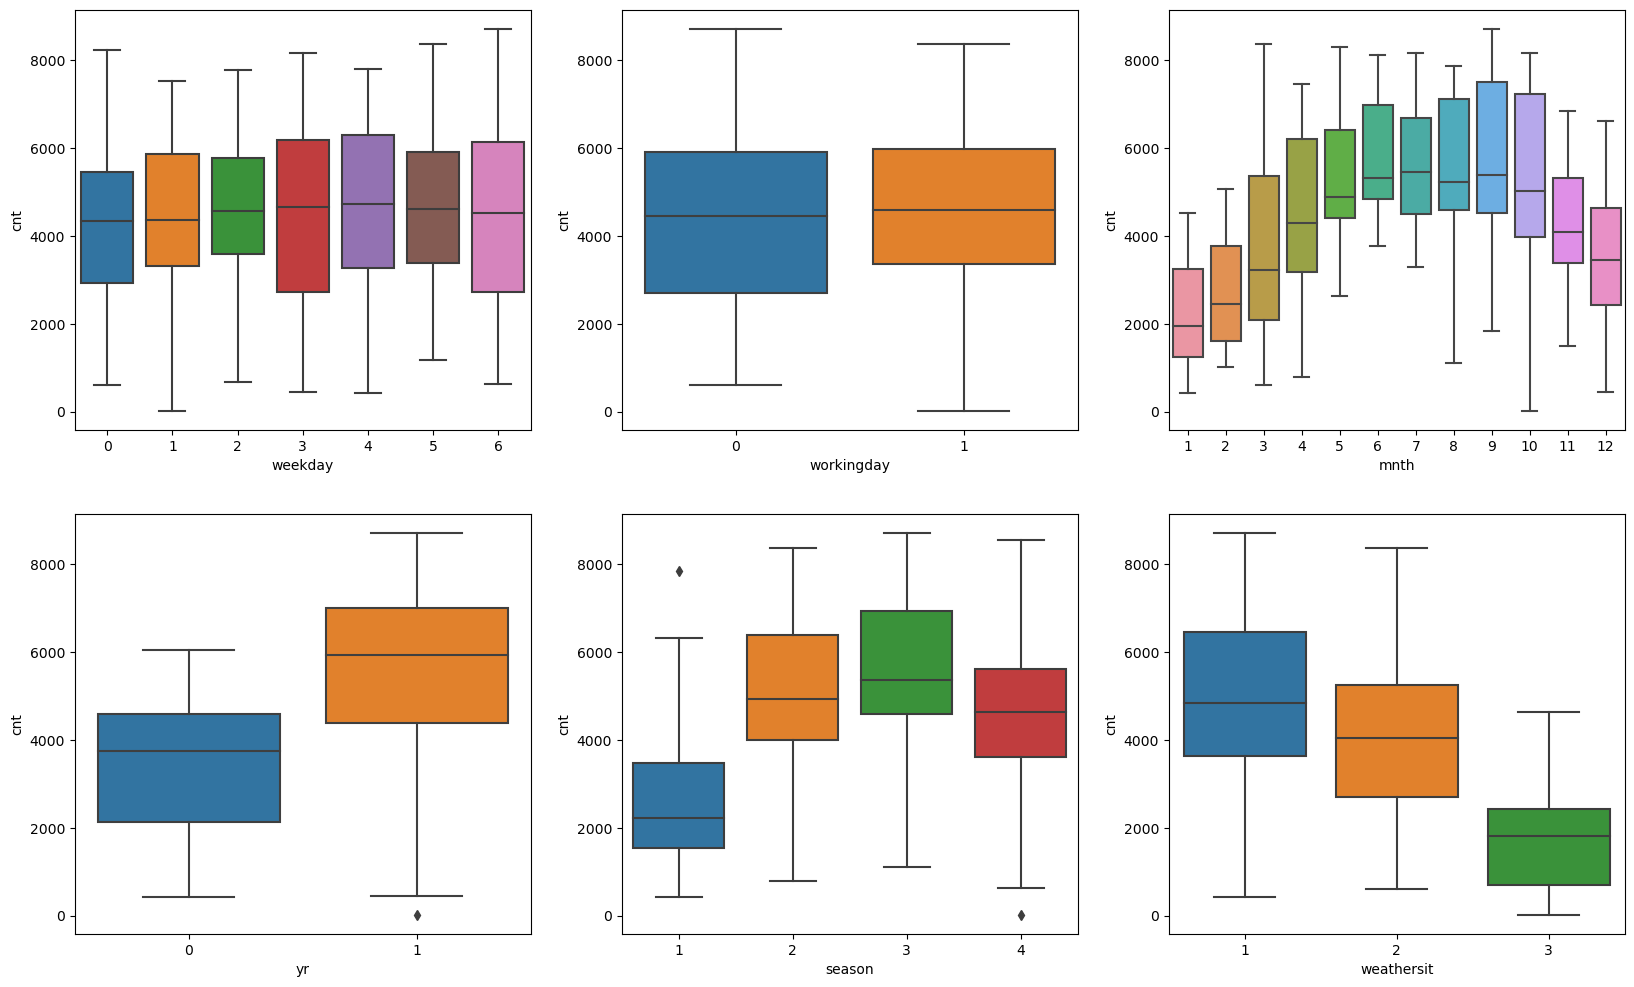

In [181]:
# Visualizing all in one frame 

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

## Demand rises more as month progresses and reaches peak in July then starts declining from oct, remain high for june through oct
### Working day and non working day has alomost comparable count(demand) i.e Non working day is not able to deviate the count that much

- Weekday, season, mnth, weathersit data represents data which is in numeric however it is representation of enumeration form of data that is non-numeric like Months name such as Jan, Feb and Week days such as  Monday tuesday ... Season such as spring winter etc.  and weather situation like clear, cloudy or rainy/snow etc.  

- Binary data is for Work day and year


In [182]:
# map yr
#bike.yr = bike.yr.map(lambda x: 2018 if x== 0 else 2019)

In [183]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [184]:
# map season , mnth,weather enum  and weekdays
seasonenum = {1:'spring',2:'summer',3:'fall',4:'winter'}
mnthenum = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

weekdayenum = {6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun'}

weatherenum = {1:'Clear', 2:'Cloudy', 3:'Rainy',4:'Snow'}

bike.mnth = bike.mnth.map(mnthenum)
bike.weekday = bike.weekday.map(weekdayenum)
bike.season = bike.season.map(seasonenum)
bike.weathersit = bike.weathersit.map(weatherenum)

bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Mon,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Tue,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [185]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 57.2+ KB


In [186]:
# Creating Dummy Variables  for categorical variables

season_dummy = pd.get_dummies(bike['season'], drop_first = True)

weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)

mnth_dummy =  pd.get_dummies(bike['mnth'], drop_first = True)

weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)

season_dummy.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [187]:
#year_dummy = pd.get_dummies(bike['yr'], drop_first=True)
#year_dummy.head()

In [188]:
weathersit_dummy.head()
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [189]:
# Concat dummy datasets to to the bike dataset
bike = pd.concat([bike, season_dummy],axis =1)
bike = pd.concat([bike, weekday_dummy],axis=1)
bike = pd.concat([bike, weathersit_dummy],axis =1)
bike = pd.concat([bike, mnth_dummy], axis=1)

bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,Mon,0,Cloudy,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,Tue,0,Cloudy,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,Wed,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,Thu,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,Fri,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [190]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  Cloudy      730 non-null    u

#### Dropping the variables as dummies will take care of it


In [191]:
bike.drop(["mnth","weekday","weathersit","season"], axis =1, inplace=True)

In [192]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   hum         730 non-null    float64
 4   windspeed   730 non-null    float64
 5   cnt         730 non-null    int64  
 6   spring      730 non-null    uint8  
 7   summer      730 non-null    uint8  
 8   winter      730 non-null    uint8  
 9   Mon         730 non-null    uint8  
 10  Sat         730 non-null    uint8  
 11  Sun         730 non-null    uint8  
 12  Thu         730 non-null    uint8  
 13  Tue         730 non-null    uint8  
 14  Wed         730 non-null    uint8  
 15  Cloudy      730 non-null    uint8  
 16  Rainy       730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Dec         730 non-null    uint8  
 19  Feb         730 non-null    u

### Splitting The data into Training and test Sets


In [193]:
# Split the data as data is in required format. 
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size =0.7, test_size =0.3, random_state=100)

df_train.shape

(510, 28)

In [194]:
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,1,19.201653,55.8333,12.208807,7534,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,1,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,16.980847,62.1250,10.792293,4066,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,10.489153,48.3333,23.500518,1796,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,15.443347,48.9583,8.708325,4220,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df_test.shape

(219, 28)

In [196]:
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,0,29.793347,63.7917,5.459106,6043,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,1,32.082500,59.2083,7.625404,6211,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,1,31.433347,42.4167,13.417286,4780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [197]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.154902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.362166,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rescaling the features
- will use the MinMax Scaling



In [198]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [199]:
scaler = MinMaxScaler()

# doing for numeric variables, rest all other are binary values (0/1)
num_vars =["hum", "windspeed", "temp","cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [200]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.154902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.362166,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [201]:
# Setting x and y

y_train = df_train.pop("cnt")
X_train = df_train


In [202]:
X_train.head()

,yr,workingday,temp,hum,windspeed,spring,summer,winter,Mon,Sat,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

## Building Model using RFE



In [204]:
lm=LinearRegression()

lm.fit(X_train, y_train)
rfe= RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [205]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', False, 10),
 ('Thu', False, 8),
 ('Tue', True, 1),
 ('Wed', False, 7),
 ('Cloudy', True, 1),
 ('Rainy', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1)]

In [206]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Mon', 'Tue', 'Cloudy', 'Rainy', 'Jan', 'Jul', 'Sep'],
      dtype='object')

In [207]:
X_train.columns[~rfe.support_]

Index(['Sat', 'Sun', 'Thu', 'Wed', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May',
       'Nov', 'Oct'],
      dtype='object')

In [208]:
# Creating dataframe for auto selected columns by RFE

X_train_rfe= X_train[col]

In [209]:
X_train_rfe = sm.add_constant(X_train_rfe)


In [210]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [211]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.31e-191
Time:                        17:37:47   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.042      4.537      0.0

In [212]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [213]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.81
2,temp,19.97
1,workingday,18.57
5,spring,5.04
8,Mon,4.95
4,windspeed,4.92
9,Tue,4.79
7,winter,3.76
6,summer,3.03
10,Cloudy,2.31


In [214]:
# Dropping Tue and rerunning the model, as it seems irrelevant

X_train_new  = X_train_new.drop(['Tue'], axis=1)

In [215]:
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit() # Running the linear model


In [216]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.70e-191
Time:                        17:37:50   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.036      6.715      0.0

In [217]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.34
2,temp,17.65
1,workingday,4.73
4,windspeed,4.71
5,spring,4.48
7,winter,3.44
6,summer,2.83
9,Cloudy,2.28
0,yr,2.09
8,Mon,1.84


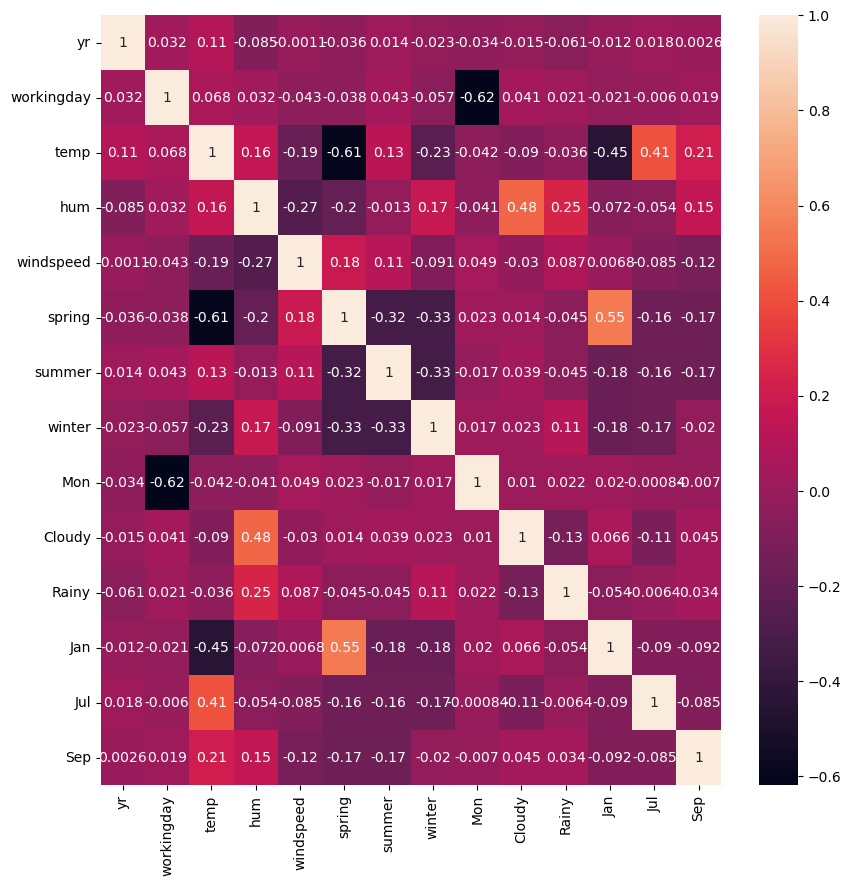

In [218]:
plt.figure(figsize =(10,10))
sns.heatmap(X_train_new.corr(),annot=True)
plt.show()

#### high correlation between July and temp, also between cloudy and humidity 


In [219]:
# humidity has high VIF and correlated with cloudy therefore dropping hum and rerunning the model
X_train_new  = X_train_new.drop(['hum'], axis=1)

In [220]:
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit() # Running the linear model

In [221]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          4.11e-189
Time:                        17:38:00   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.031      5.294      0.0

In [222]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.31
0,yr,2.08
6,winter,1.92
7,Mon,1.84
10,Jan,1.62
11,Jul,1.59


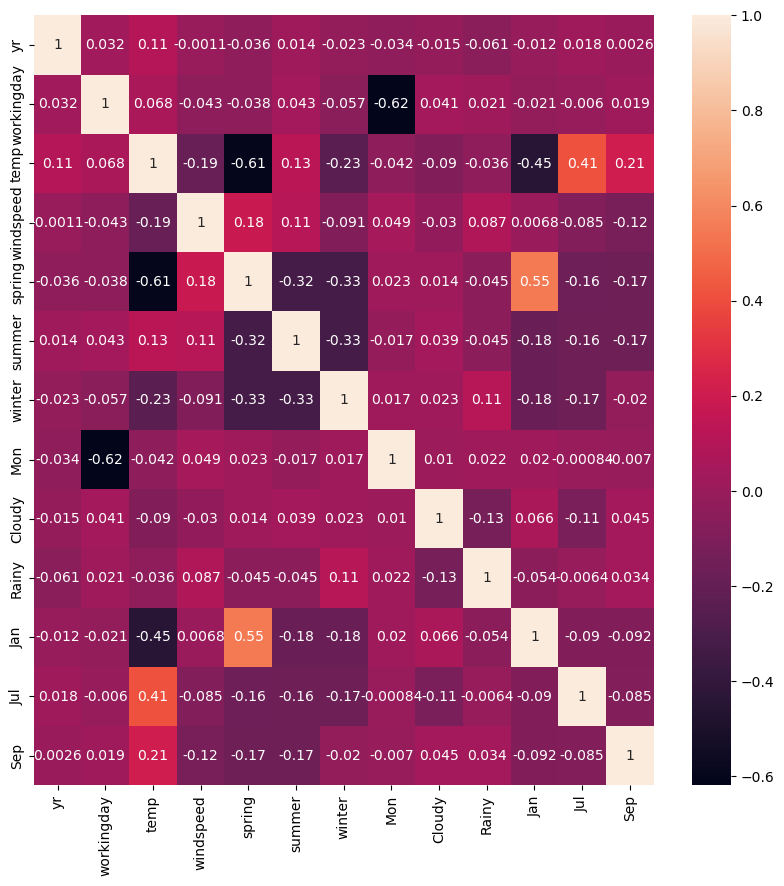

In [223]:
plt.figure(figsize =(10,10))
sns.heatmap(X_train_new.corr(),annot=True)
plt.show()

In [224]:
# removing other variable that have high correlation ( JAn and spring)

X_train_new  = X_train_new.drop(['Jan'], axis=1)

In [225]:
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit() # Running the linear model

In [226]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          3.28e-189
Time:                        17:38:05   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

In [227]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
7,Mon,1.83
10,Jul,1.58
8,Cloudy,1.56


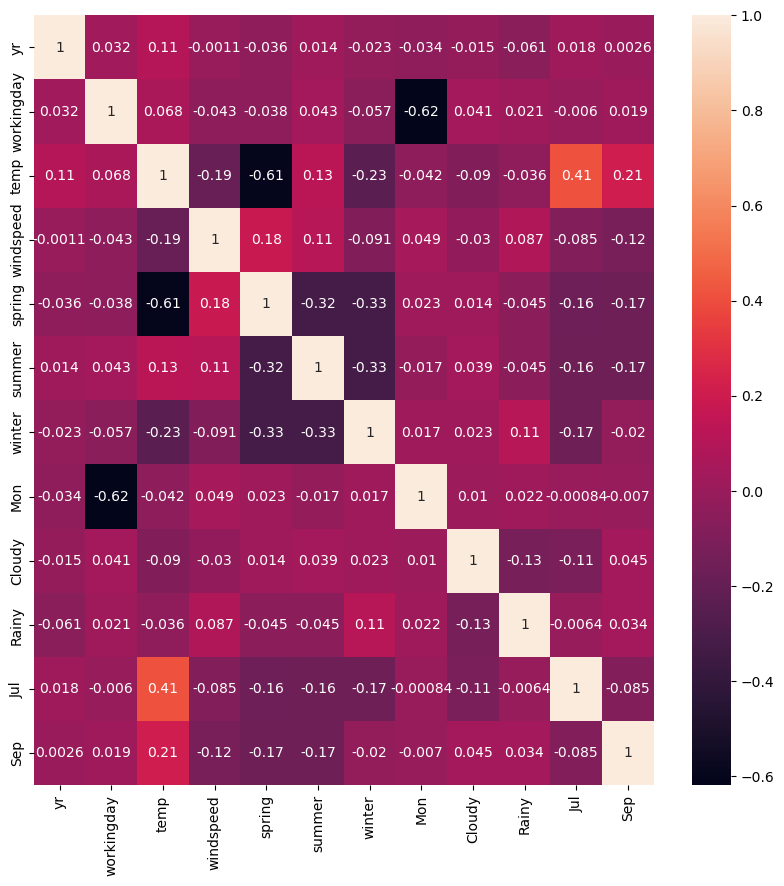

In [228]:
plt.figure(figsize =(10,10))
sns.heatmap(X_train_new.corr(),annot=True)
plt.show()

In [229]:
X_train_new  = X_train_new.drop(['Jul'], axis=1)

In [230]:
X_train_lm = sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit() # Running the linear model

In [231]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          6.86e-189
Time:                        17:38:08   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.031      4.599      0.0

In [232]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
7,Mon,1.83
6,winter,1.77
8,Cloudy,1.56
10,Sep,1.23


In [233]:



# Residual Analysis

y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

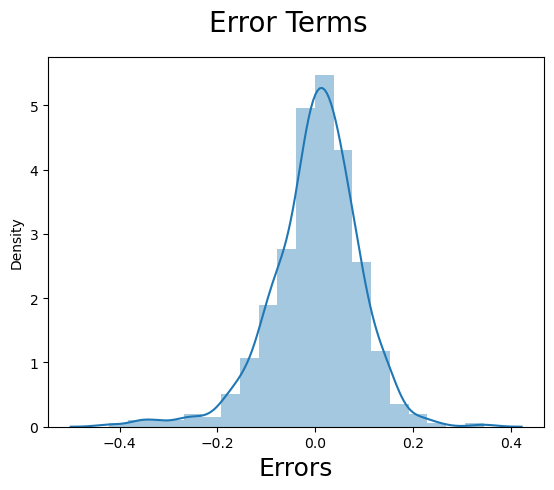

In [234]:
 #Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

# Making Predictions 

In [235]:
num_vars =["hum", "windspeed", "temp","cnt"]

#### Applying the scaling on the test sets

In [236]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing  int X_test and y_test


In [237]:
y_test = df_test.pop('cnt')
X_test =df_test

In [238]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [239]:
# Making predictions
y_pred = lm.predict(X_test_new)

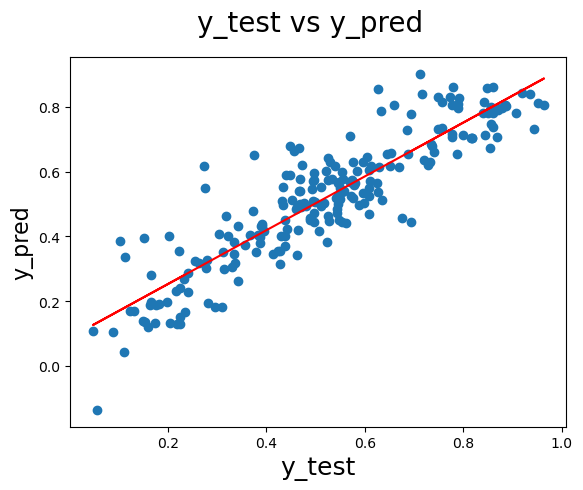

In [240]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

coefficients = np.polyfit(y_test, y_pred, 1)

# Create line of best fit
line = np.poly1d(coefficients)

plt.plot(y_test, line(y_test), color='red')
plt.show()

### Equation for best fit



- Cnt = 0.2343 x yr + 0.48 x temp + 0.0615 x summer + 0..0972 x winter + 0.0557 x workingday  - 0.1501 x Windspeed -  0.0817 x cloudy - 0.2902 x Rainy - 0.0551 x Spring

In [243]:
# R-squared value for the final model on test set

r2 = r2_score(y_test, y_pred)
print(r2)

0.8058786233591084


In [244]:
# Adjusted R-squared value for the final model on test set

Adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-9-1))
print(Adj_r2)

0.797519329628161




### R- square on test dataset is 80.58% and adjusted R square is 79.75% 

### These values are acceptable so the model is valid with following features:
- yr
- temp
- Summer
- Workingday
- windspeed
- Spring
- Winter
- Rainy
- Cloudy